# Search text

In [15]:
import io, json

vacancy_search_text = "c++ senior"

def load_json_from_file(path):
    with io.open(path, encoding='utf-8', mode='r') as  json_file:
        return json.load(json_file)

raw_vacancy_data = load_json_from_file("json/"+vacancy_search_text+".json")
print(vacancy_search_text)

c++ senior


In [16]:
import datetime
def prepare_vacancy_data(vacancy_data):
    new_vacancy_data = []
    for vacancy in vacancy_data:
        new_vacancy = {}        
        new_vacancy["key_skills"] = ', '.join(list(vacancy["key_skills"] or []))
        #new_vacancy["key_skills"] = list(vacancy["key_skills"] or [])
        #new_vacancy["key_skills"] = pd.Series(data=list(vacancy["key_skills"] or []))
        new_vacancy["name"] = vacancy["name"]
        new_vacancy["id"] = vacancy["id"]        
        new_vacancy["description"] = vacancy["description"]
        new_vacancy["salary"] = vacancy["salary"]       
        new_vacancy["creation_time"] = vacancy["creation_time"]
        if "name" in vacancy["employer"]:
            new_vacancy["employer"] = vacancy["employer"]["name"]
        if "visible_name" in vacancy["employer"]:
            new_vacancy["employer"] = vacancy["employer"]["visible_name"]        
        
        if "schedule" in vacancy:
            if type(vacancy["schedule"]) == str:            
                new_vacancy["schedule"] = vacancy["schedule"]  
            if type(vacancy["schedule"]) == dict:            
                new_vacancy["schedule"] = vacancy["schedule"]["id"]   
            
        new_vacancy["accept_temporary"] = vacancy["accept_temporary"]       
        new_vacancy_data.append(new_vacancy)
    return new_vacancy_data

vacancys_data = prepare_vacancy_data(raw_vacancy_data)

In [17]:
import pandas as pd

df = pd.DataFrame(columns= list(vacancys_data[0].keys()))
ind = 0
for data in vacancys_data:     
    if (len(df.columns)==len(data)):
        df.loc[ind] = data
        ind+=1

df.to_csv("csv/"+vacancy_search_text+".csv", encoding="utf8", index=False) 

In [18]:
import pandas as pd
df = pd.DataFrame()
df=pd.read_csv("csv/"+vacancy_search_text+".csv", encoding="utf8" )

In [19]:
import re 
import math
from currency_converter import CurrencyConverter
from datetime import date # datetime works too
c = CurrencyConverter()

def process_salary_value (salary_structure):
    salary = salary_structure
    salary_value = False

    if ("from" in salary) and ("to" in salary):
        salary_value = ((salary["from"] or 0) + (salary["to"] or 0))/2
    else:
        if "from" in salary:
            salary_value = salary["from"]
        if "to" in salary:
            salary_value = salary["to"]    
    return salary_value

for vacancy in vacancys_data:
    if type(vacancy["salary"]) == dict:
        salary = vacancy["salary"]        
        salary_value = process_salary_value (salary)
                
        if salary_value and ("currency" in salary):
            if not(re.search(r'RUR', salary["currency"])):
                try:
                    salary_value = math.floor(c.convert(salary_value, salary["currency"], 'RUB'))
                    df.at[vacancys_data.index(vacancy),"salary"] = salary_value
                    #print(salary_value,"from", salary["currency"])                       
                except Exception as err:
                    #print("Problems with currency "+salary["currency"], err)
                    pass
            else:
                df.at[vacancys_data.index(vacancy),"salary"] = salary_value

In [20]:
import pandas as pd
pd.set_option("display.max_rows",None)
display(df)

,key_skills,name,id,description,salary,creation_time,employer,schedule,accept_temporary
0,"C/C++, Linux, C++, Go",Middle/Senior C/C++ Software Developer,52171563,**Setplex** is a software development company ...,NaN,2022-02-07T15:05:02.680+03:00,SETPLEX / Bld Soft,FULL_DAY,False
1,"C#, Unity 3D, .NET Core, Разработка ПО, ООП, Л...",Senior C# Developer / Программист C# 1 категории,52212518,"Старт-ап, основанный всемирно признанными про...",200000,2022-02-08T15:28:05.023+03:00,Qonic Research (ООО Коник Ресерч),FULL_DAY,False
2,"Английский — B2 — Средне-продвинутый, IoT, C++...",C++ Engineer (Industrial IoT solutions) / Разр...,52149396,We are seeking for an **experienced and innova...,NaN,2022-02-07T09:32:28.286+03:00,Siemens,FLEXIBLE,False
3,"iOS, Objective-C, Swift, OpenGL, OpenCV",Senior iOS Engineer (Pixomatic),48916064,**Apalon** \- компания-разработчик мобильных п...,NaN,2021-10-18T11:02:20.006+03:00,APALON,FULL_DAY,False
4,"Английский — B2 — Средне-продвинутый, IoT, C++...",C++ Engineer (Industrial IoT solutions) / Разр...,51095899,We are seeking for an **experienced and innova...,NaN,2022-01-14T14:33:17.598+03:00,Siemens,FULL_DAY,False
5,"Английский — B2 — Средне-продвинутый, Linux, J...",Senior Java Developer for Viber Core Team,51959385,**On behalf of Viber we are looking for a Sen...,NaN,2022-01-31T15:19:35.720+03:00,Ncube,REMOTE,False
6,"Английский — A1 — Начальный, Qt, Kotlin, Andro...",Senior Mobile Developer - старший мобильный ра...,50616731,Ваша цель будет заключаться в разработке мобил...,300000,2021-12-21T19:28:07.290+03:00,Арнаут Алексей,FULL_DAY,False
7,"Python, Linux, Bash, C++",Senior C++ developer,52090588,"**[Если эта вакансия не для вас, но вы знаете,...",500000,2022-02-04T01:18:05.858+03:00,Wunder Fund,REMOTE,True
8,"Linux, C++",Senior С/C++ разработчик,52073449,Мы небольшая (до 50 человек) компания в которо...,250000,2022-02-03T13:39:00.819+03:00,24 часа ТВ,FLEXIBLE,False
9,NaN,Программист С++ Senior,50397447,"**IT Prime** является современной, высокотехн...",400000,2021-12-13T09:35:19.831+03:00,Айти Прайм,FLEXIBLE,False


In [21]:
def make_simple_word_pie(data_frame,collumn,title):
    plt.title(title or collumn)
    word_series = df[collumn]
    word_series = pd.Series(data=list(Counter(word_series.values)), 
                                index=list(Counter(word_series.values).values()))
    wedges, patches, texts = plt.pie(word_series.index, 
                                     labels = word_series.values, 
                                     autopct='%1.1f%%')
    plt.legend(labels = word_series.values)    

Средняя зарплата:  169060
Медианная зарплата:  150000
Среднеквадратичное отклонение зарплаты:  134389
Вакансий:  2004
Вакансий с открытой зарплатой:  737 ед., 36 %
Вакансий без нижней или верхней границы зарплаты:  1267 ед., 63 %
Вакансия с максимальной зарплатой


,key_skills,name,id,description,salary,creation_time,employer,schedule,accept_temporary
751,"Blockchain, Architector, С++, Go, Rust, Resear...",Blockchain - Senior Research Engineer (Archite...,52035552,"Компания, с 2016 г. занимающаяся разработкой ...",1284350,2022-02-02T14:09:27.365+03:00,Кадровое агентство Алексея Сухорукова,REMOTE,False


Вакансия с минимальной зарплатой


,key_skills,name,id,description,salary,creation_time,employer,schedule,accept_temporary
829,"SQL, Java, Linux, ООП, PostgreSQL, C/C++, C++,...","Ведущий разработчик C, C++",50579948,«Билайн» сейчас – компания изменений. В 202...,180,2021-12-20T15:06:37.242+03:00,билайн,REMOTE,False


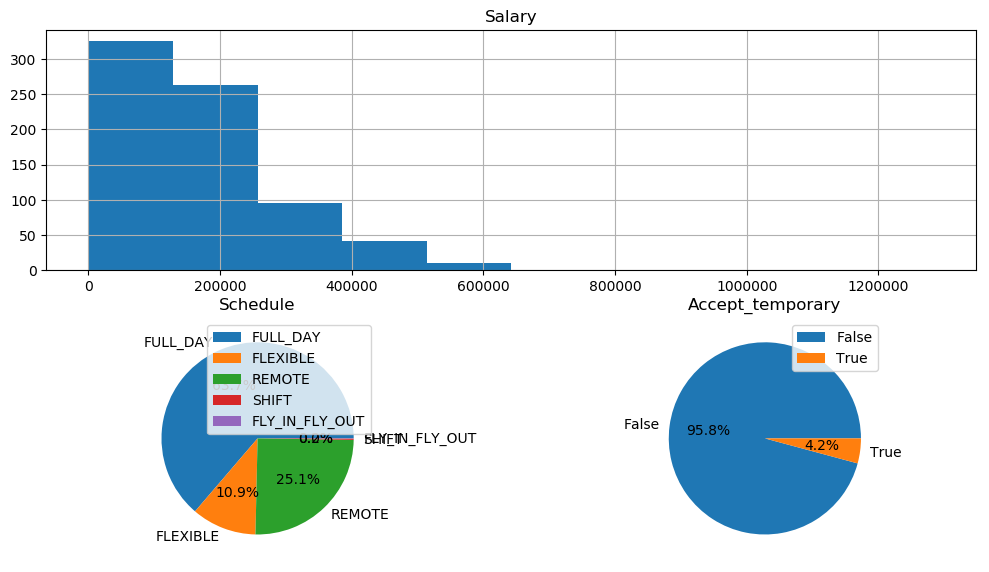

In [22]:
from collections import Counter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

salary_series = pd.to_numeric(df["salary"], errors = "coerce")

print("Средняя зарплата: ",math.floor((salary_series.mean(skipna=True))))
print("Медианная зарплата: ",math.floor(salary_series.median(skipna=True)))
print("Среднеквадратичное отклонение зарплаты: ",math.floor(salary_series.std(skipna=True)))
vacancies_count = len(salary_series)
print("Вакансий: ",vacancies_count)
open_salary_vacancies = salary_series.count()
screwed_salary_vacancies = len(salary_series)-open_salary_vacancies
print("Вакансий с открытой зарплатой: ",
      open_salary_vacancies, "ед.,", 
      math.floor(100*open_salary_vacancies/vacancies_count), "%")
print("Вакансий без нижней или верхней границы зарплаты: ",
      screwed_salary_vacancies, "ед.,",  
      math.floor(100*screwed_salary_vacancies/vacancies_count), "%")

print("Вакансия с максимальной зарплатой")
pd.set_option("display.max_rows",None)
display(df[salary_series.idxmax():salary_series.idxmax()+1])
print("Вакансия с минимальной зарплатой")
pd.set_option("display.max_rows",None)
display(df[salary_series.idxmin():salary_series.idxmin()+1])


fz = plt.figure(figsize=(12, 7), dpi=100)
fz.add_subplot(2,1,1)
plt.title('Salary')
salary_series.hist()
fz.add_subplot(2,2,3)
make_simple_word_pie(df,"schedule",'Schedule')
fz.add_subplot(2,2,4)
make_simple_word_pie(df,"accept_temporary",'Accept_temporary')

In [23]:
from collections import Counter
import scipy
import re

# source: https://github.com/hukenovs/hh_research/
def top_keys(df):
    # Collect keys from dataframe
    keys_df = df['key_skills'].tolist()
    # Create a list of keys for all vacancies
    lst_keys = []
    for keys_elem in keys_df:
        if type(keys_elem) == str:
            for el in keys_elem[0:].split(', '):
                if el != '':
                    lst_keys.append(re.sub('\'', '', el.lower()))

    # Unique keys and their counter
    set_keys = set(lst_keys)
    # Dict: {Key: Count}
    dct_keys = {el:lst_keys.count(el) for el in set_keys}
    # Sorted dict
    srt_keys = dict(sorted(dct_keys.items(), key=lambda x: x[1], reverse=True))
    # Return pandas series
    return pd.Series(srt_keys, name='key_skills')


In [24]:
def cut_frequencys (data_series, stat = "median"):
    #частоты частот
    freq = dict(Counter(list(data_series.values)))
    freq_values = list(freq.values())
    freq_values.sort(reverse=True)

    if stat == "mean":
        freq_border = scipy.mean(freq_values)
    else:
        freq_border = scipy.median(freq_values)

    new_series = data_series.copy()    
    for index, value in data_series.items():   
        if freq[value]>freq_border:
            new_series=new_series.drop(labels=index)
   
    return new_series

### Key skills from tags

In [25]:
def make_word_barh(word_series):
    #plt.xticks(rotation='vertical')
    current_series = word_series[:25].sort_values(ascending=True)
    plt.barh(current_series.index, current_series.values)    

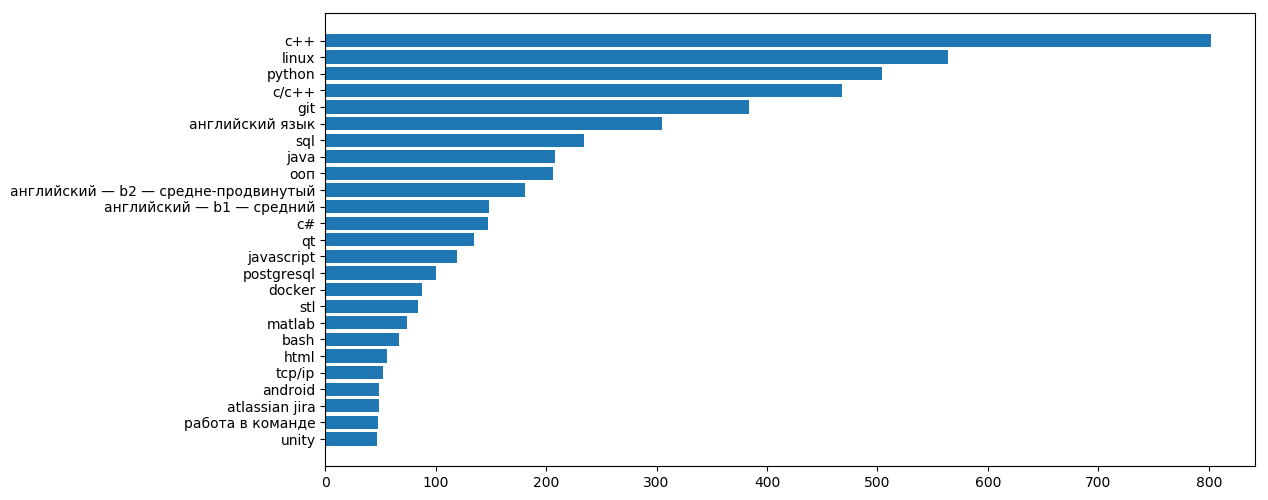

In [26]:
from matplotlib import pyplot as plt
fz = plt.figure(figsize=(12, 6), dpi=100)
fz.add_subplot(1,1,1)
make_word_barh(cut_frequencys (top_keys(df)))

### Key skills from description

In [27]:
additional_tegs = []
for dsc in df.description:
    searched = re.findall(r"(([A-z]+[\s/-]*)+)+", dsc)
    for pair in searched: 
        addteg = list(pair)[0]
        #addteg = re.sub(r'\s+|\W+','', addteg)
        addteg = re.sub(r'[\s|\W]+','', addteg)
        addteg = addteg.lower()
        if re.search(r'\w+', addteg):
            additional_tegs.append(addteg)    
            
description_freq = pd.Series(Counter(additional_tegs)).sort_values(ascending=False)

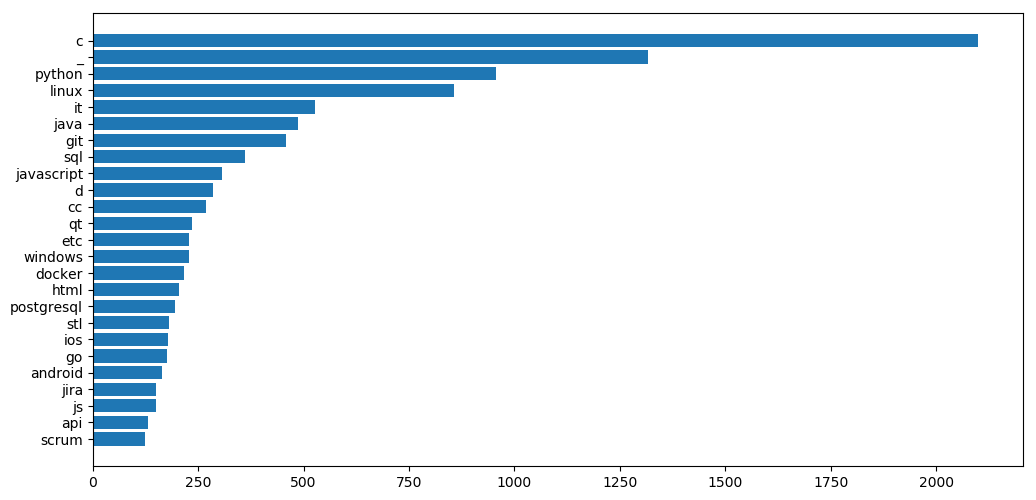

In [28]:
fz = plt.figure(figsize=(12, 6), dpi=100)
fz.add_subplot(1,1,1)
make_word_barh(description_freq)

In [27]:
! git add main.*
! git commit -m "refactoring, fixed some graph issues" 

The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
hint: You've added another git repository inside your current repository.
hint: Clones of the outer repository will not contain the contents of
hint: the embedded repository and will not know how to obtain it.
hint: If you meant to add a submodule, use:
hint: 
hint: 	git submodule add <url> hh_ru_parser
hint: 
hint: If you added this path by mistake, you can remove it from the
hint: index with:
hint: 
hint: 	git rm --cached hh_ru_parser
hint: 
hint: See "git help submodule" for more information.


[main 9e29212] implemented statistics for salary, improved currency convertion
 51 files changed, 1027983 insertions(+), 10982 deletions(-)
 rewrite .ipynb_checkpoints/main-checkpoint.ipynb (90%)
 create mode 100644 c++ junior.csv
 create mode 100644 c++ middle.csv
 create mode 100644 golang junior.csv
 create mode 100644 golang middle.csv
 create mode 100644 golang senior.csv
 create mode 160000 hh_ru_parser
 create mode 100644 hhparser/__init__.py
 create mode 100644 hhparser/__pycache__/__init__.cpython-37.pyc
 create mode 100644 hhparser/__pycache__/api.cpython-37.pyc
 create mode 100644 hhparser/__pycache__/bless.cpython-37.pyc
 create mode 100644 hhparser/__pycache__/parser.cpython-37.pyc
 create mode 100644 hhparser/__pycache__/proxy.cpython-37.pyc
 create mode 100644 hhparser/__pycache__/scrapper.cpython-37.pyc
 create mode 100644 hhparser/__pycache__/template_parser.cpython-37.pyc
 create mode 100644 hhparser/__pycache__/vacancy_decorator.cpython-37.pyc
 create mode 100644 hhp